In [10]:
import pandas as pd

In [11]:
%matplotlib inline

In [12]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [13]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [14]:
df.columns = [x.lower() for x in df.columns]
df = df.drop('id', axis=1)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default.payment.next.month'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
# randomly partition this dataset into a separate test and training dataset is to use the train_
# test_split function from scikit-learn's module
X = df.drop('default.payment.next.month', axis=1)
# X1 = df.drop('default.payment.next.month', axis=1).values

# # rescale the data to the same mean and standard deviation
# from sklearn import preprocessing, metrics
# scaler = preprocessing.StandardScaler()
# X = scaler.fit(X).transform(X)

y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
y.head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default.payment.next.month, dtype: int64

In [17]:
X.head(10)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,50000.0,1,1,2,37,0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,500000.0,1,1,2,29,0,0,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [19]:
# Using Sklearn's Pipeline function to combining features transformers and estimators; 
# It consisted of two intermediate steps, a StandardScaler and a PCA transformer, and a Decision tree classifier as a final estimator.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Check performance of decision tree algorithm with feature thransformation of StandardScaler and a PCA transformer
pipe_dt_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', DecisionTreeClassifier(criterion='gini', random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_dt_1, X=X_train, y=y_train, cv=10, n_jobs=1)
print('pipe_dt_1 Cross_validation accuracy scores: %s' % (scores))
print('pipe_dt_1 Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

KeyboardInterrupt: 

In [ ]:
# %load find_best_model.py
from time import time
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


def find_best_model(estimator, X_train, y_train, param_grid, scoring='accuracy', cv=3, n_jobs=-1):

    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
    start = time()

    grid_search.fit(X_train, y_train)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))
    report(grid_search.cv_results_)

    # scores = cross_val_score(grid_search, X_train, y_train, scoring=scoring, cv=cv)
    # print('Nested_Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

    # Select the best model from grid_search
    clf = grid_search.best_estimator_

    start2 = time()

    # Train using the best model
    clf.fit(X_train, y_train)

    print("Training with the best model took %f seconds." % (time() - start2))

    return clf

In [51]:
from time import time
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


def find_best_model_random_search(estimator, X_train, y_train, param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1):

    random_search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=n_iter, 
                                       scoring=scoring, cv=cv, n_jobs=-1)
    
    start = time()

    random_search.fit(X_train, y_train)

    print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(random_search.cv_results_['params'])))
    report(random_search.cv_results_)

    # scores = cross_val_score(grid_search, X_train, y_train, scoring=scoring, cv=cv)
    # print('Nested_Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

    # Select the best model from grid_search
    clf = random_search.best_estimator_

    start2 = time()

    # Train using the best model
    clf.fit(X_train, y_train)

    print("Training with the best model took %f seconds." % (time() - start2))

    return clf

In [ ]:
# %load plot_validation_curve.py
# Addressing overfitting and underfitting with validation curves
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_validation_curve(estimator, X, y, param_name, param_range, x_label, ylim=[0.5, 1.05], cv=10, scoring="accuracy", n_jobs=1):


    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv=cv, scoring=scoring, n_jobs=n_jobs)
    # calculate the average accuracies from the returned cross-validated training
    # and test scores for the different values of the model parameters, which we plotted using matplotlib's plot function.
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, color='red', marker='o', markersize=5, label='training score')
    plt.fill_between(param_range, train_mean - train_std,
                         train_mean + train_std, alpha=0.1,
                         color="r")
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation score')
    plt.fill_between(param_range, test_mean - test_std,
                         test_mean + test_std, alpha=0.1, color="g")
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(scoring)
    plt.legend(loc='lower right')
    plt.ylim(ylim)

    return plt

In [62]:
# %load plot_learning_curve.py
# Debugging algorithms with learning and validation curves
# use learning curves to diagnose if a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias).
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.01, 1.0, 10), cv=10, scoring='f1', n_jobs=-1, ylim=[0.5, 1.05]):
    '''
    
    :param estimator: 
    :param X: 
    :param y: 
    :param train_sizes: 
    :param cv: 
    :param n_jobs: 
    :return: 
    '''

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, 
                                                            scoring=scoring,n_jobs=n_jobs)
    # calculate the average accuracies from the returned cross-validated training
    # and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function.
    # print(train_scores)
    train_mean = np.mean(train_scores, axis=1)
    print(train_mean)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='training score')
    plt.fill_between(train_sizes, train_mean - train_std,
                         train_mean + train_std, alpha=0.1,
                         color="r")
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation score')
    plt.fill_between(train_sizes, test_mean - test_std,
                         test_mean + test_std, alpha=0.1, color="g")
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('f1 score')
    plt.legend(loc='lower right')
    plt.ylim(ylim)
    plt.show()
    # return plt

In [ ]:
# %load evaluation.py
# Looking at different performance evaluation metrics in testing data set：confusion matrix, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from time import time


def evaluation(estimator, X_test, y_test):

    start = time()
    y_pred = estimator.predict(X_test)
    print("Querying with the best model took %f seconds." % (time() - start))
    print(len(y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
    print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
    print('-----------------------------------------')
    print(metrics.classification_report(y_test, y_pred))

In [ ]:
'''
Tuning decision tree parameters: 
(1) max_depth : int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
(2) min_impurity_split : float,
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
(3) min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
(4) class_weight : dict, list of dicts, “balanced” or None, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
'''

param_grid_dt = {"clf__max_depth": [None, 2, 5, 10, 15],
                 'clf__min_impurity_split': [0, 0.1, 0.2, 0.3, 0.4],
                 'clf__min_samples_leaf': [1, 5, 10],
                 'clf__class_weight': [None, 'balanced']
                }
pipe_dt_2 = find_best_model(pipe_dt_1, X_train, y_train, param_grid=param_grid_dt, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
param_name = 'clf__max_depth'
param_range = range(1, 21, 2)
plot_validation_curve(pipe_dt_2, X_train, y_train, param_name, param_range, 'max_depth', [0.6, 1.05])

In [ ]:
param_name = 'clf__min_samples_leaf'
param_range = range(1, 22, 4)
plot_validation_curve(pipe_dt_2, X_train, y_train, param_name, param_range, 'min_samples_leaf', [0.6, 1.05])

In [ ]:
param_name = 'clf__min_impurity_split'
param_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plot_validation_curve(pipe_dt_2, X_train, y_train, param_name, param_range, 'min_impurity_split', [0.6, 1.05])

In [ ]:
plot_learning_curve(pipe_dt_2, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.75, 0.8])

In [ ]:
evaluation(pipe_dt_2, X_test, y_test)

In [20]:
df.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
df.head(10)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [21]:
# Number of data points in the minority class
number_records_default = len(df[df.default == 1])
default_indices = np.array(df[df.default == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.default == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_default, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([default_indices,random_normal_indices])

# Under sample dataset
under_sample_df = df.iloc[under_sample_indices,:]

# X_undersample = under_sample_df.ix[:, under_sample_df.columns != 'default']
# y_undersample = under_sample_df.ix[:, under_sample_df.columns == 'default']

X_undersample = under_sample_df.drop('default', axis=1)
y_undersample = under_sample_df['default']

# Showing ratio
print("Percentage of non-default cases: ", len(under_sample_df[under_sample_df.default == 0])/len(under_sample_df))
print("Percentage of default cases: ", len(under_sample_df[under_sample_df.default == 1])/len(under_sample_df))
print("Total number of cases in resampled data: ", len(under_sample_df))

Percentage of non-default cases:  0.5
Percentage of default cases:  0.5
Total number of cases in resampled data:  13272


In [22]:
# Split Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number cases train dataset: ", len(X_train))
print("Number cases test dataset: ", len(X_test))
print("Total number of cases: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number cases train Undersampled dataset: ", len(X_train_undersample))
print("Number cases test Undersampled dataset: ", len(X_test_undersample))
print("Total number of cases in Undersampled dataset: ", len(X_train_undersample)+len(X_test_undersample))

Number cases train dataset:  21000
Number cases test dataset:  9000
Total number of cases:  30000

Number cases train Undersampled dataset:  9290
Number cases test Undersampled dataset:  3982
Total number of cases in Undersampled dataset:  13272


In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_undersample.shape, X_test_undersample.shape, y_train_undersample.shape, y_test_undersample.shape

((21000, 23),
 (9000, 23),
 (21000,),
 (9000,),
 (9290, 23),
 (3982, 23),
 (9290,),
 (3982,))

In [44]:
# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_dt_1, X=X_train_undersample, y=y_train_undersample, cv=10, n_jobs=1)
print('pipe_dt_1 Cross_validation accuracy scores in undersample data: %s' % (scores))
print('pipe_dt_1 Cross_validation accuracy in undersample data: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_dt_1 Cross_validation accuracy scores in undersample data: [ 0.60430108  0.62473118  0.63616792  0.57265877  0.60064586  0.58234661
  0.60279871  0.5780409   0.59698276  0.60344828]
pipe_dt_1 Cross_validation accuracy in undersample data: 0.600 +/- 0.019


In [68]:
'''
Tuning decision tree parameters: 
(1) max_depth : int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
(2) min_impurity_split : float,
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
(3) min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
(4) class_weight : dict, list of dicts, “balanced” or None, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
'''

param_grid_dt = {"clf__max_depth": [None, 2, 5, 10, 15],
                 'clf__min_impurity_split': [0, 0.1, 0.2, 0.3, 0.4],
                 'clf__min_samples_leaf': [1, 5, 10],
                 'clf__class_weight': [None, 'balanced']
                }
pipe_dt_3 = find_best_model(pipe_dt_1, X_train_undersample, y_train_undersample, param_grid=param_grid_dt, scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 106.90 seconds for 150 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.669 (std: 0.007)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': 15, 'clf__min_samples_leaf': 10, 'clf__class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.668 (std: 0.008)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__class_weight': None}

Model with rank: 3
Mean validation score: 0.668 (std: 0.008)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': 15, 'clf__min_samples_leaf': 10, 'clf__class_weight': None}

Model with rank: 4
Mean validation score: 0.668 (std: 0.009)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__class_weight': 'balanced'}

Model with rank: 5
Mean validation score: 0.668 (std: 0.010)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': 15, 'clf__min_samples_leaf': 1, 'clf__class_weight'

Querying with the best model took 0.011022 seconds.
3982
[[1432  616]
 [ 684 1250]]


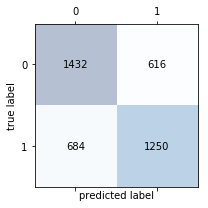

Precision: 0.670
Recall: 0.646
F1: 0.658
ROC AUC: 0.673
Accuracy: 0.674
-----------------------------------------
             precision    recall  f1-score   support

          0       0.68      0.70      0.69      2048
          1       0.67      0.65      0.66      1934

avg / total       0.67      0.67      0.67      3982



In [69]:
evaluation(pipe_dt_3, X_test_undersample, y_test_undersample)

Querying with the best model took 0.017047 seconds.
9000
[[4905 2155]
 [ 566 1374]]


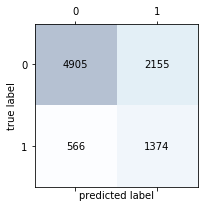

Precision: 0.389
Recall: 0.708
F1: 0.502
ROC AUC: 0.702
Accuracy: 0.698
-----------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.69      0.78      7060
          1       0.39      0.71      0.50      1940

avg / total       0.79      0.70      0.72      9000



In [70]:
evaluation(pipe_dt_3, X_test, y_test)

In [64]:
# pipe_dt_3 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), 
#                       ('clf', DecisionTreeClassifier(criterion='gini', min_impurity_split=0.4, max_depth=15, 
#                                                      min_samples_leaf=10, class_weight='balanced', random_state=2))])

In [71]:
pipe_dt_3

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=15,...split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2, splitter='best'))])

In [49]:
pipe_dt_4 = pipe_dt_3.fit(X_train, y_train)

Querying with the best model took 0.015533 seconds.
9000
[[5321 1739]
 [ 793 1147]]


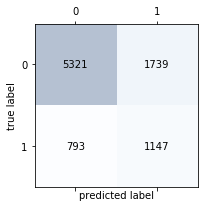

Precision: 0.397
Recall: 0.591
F1: 0.475
ROC AUC: 0.672
Accuracy: 0.719
-----------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.75      0.81      7060
          1       0.40      0.59      0.48      1940

avg / total       0.77      0.72      0.74      9000



In [50]:
evaluation(pipe_dt_4, X_test, y_test)

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

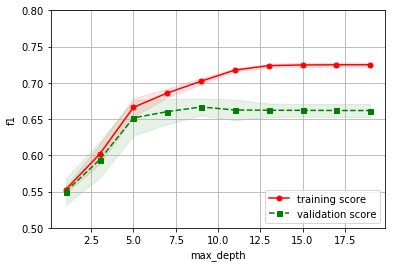

In [74]:
param_name = 'clf__max_depth'
param_range = range(1, 21, 2)
plot_validation_curve(pipe_dt_3, X_train_undersample, y_train_undersample, param_name, param_range, 
                      'max_depth', [0.5, 0.8], scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

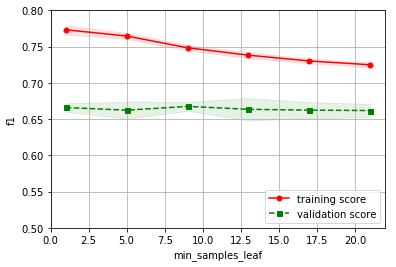

In [75]:
param_name = 'clf__min_samples_leaf'
param_range = range(1, 22, 4)
plot_validation_curve(pipe_dt_3, X_train_undersample, y_train_undersample, param_name, param_range, 
                      'min_samples_leaf', [0.5, 0.8], scoring="f1")

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\metrics\classificatio

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

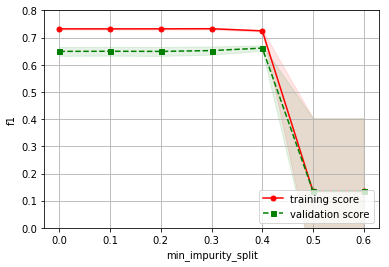

In [82]:
param_name = 'clf__min_impurity_split'
param_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plot_validation_curve(pipe_dt_3, X_train_undersample, y_train_undersample, param_name, param_range, 
                      'min_impurity_split', [0.0, 0.8], scoring="f1")

In [87]:
pipe_dt_3 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), 
                       ('clf', DecisionTreeClassifier(criterion='gini', min_impurity_split=0.4, max_depth=15, 
                                                      min_samples_leaf=10, class_weight='balanced', random_state=2))])

[ 0.76855654  0.74883444  0.74444103  0.74182613  0.73932793  0.73711481
  0.73917598  0.74042705  0.74472277  0.74141582]


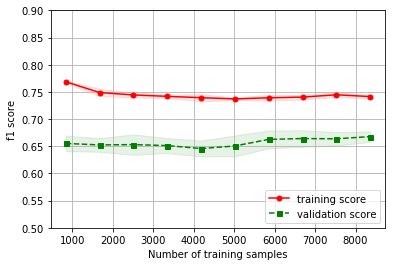

In [90]:
plot_learning_curve(pipe_dt_3, X_train_undersample, y_train_undersample, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.5, 0.9])

In [91]:
pipe_dt_3

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=15,...split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2, splitter='best'))])

Querying with the best model took 0.005515 seconds.
3982
[[1432  616]
 [ 684 1250]]


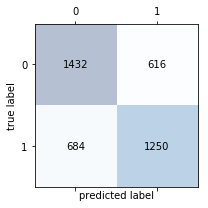

Precision: 0.670
Recall: 0.646
F1: 0.658
ROC AUC: 0.673
Accuracy: 0.674
-----------------------------------------
             precision    recall  f1-score   support

          0       0.68      0.70      0.69      2048
          1       0.67      0.65      0.66      1934

avg / total       0.67      0.67      0.67      3982



In [93]:
pipe_dt_3.fit(X_train_undersample, y_train_undersample)
evaluation(pipe_dt_3, X_test_undersample, y_test_undersample)

In [75]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.ensemble import AdaBoostClassifier
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a Adaboost classifier using a decision tress stump with "gini" and other default parameter
pipe_ada_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'), 
                    random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_ada_1, X=X_train_undersample, y=y_train_undersample, cv=10, n_jobs=1, scoring="f1")
print('pipe_ada_1 Cross_validation f1 scores: %s' % (scores))
print('pipe_ada_1 Cross_validation f1 socre: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_ada_1 Cross_validation f1 scores: [ 0.61392405  0.56599553  0.6125      0.62403528  0.61189189  0.61422414
  0.58461538  0.56531532  0.57653631  0.58112407]
pipe_ada_1 Cross_validation f1 socre: 0.595 +/- 0.021


In [96]:
# Tuning parameters: 
# (1) n_estimators : integer, optional (default=50), we choose to tune from 20-80;
# The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
# (2) ada__base_estimator__max_depth: [1, 3, 5, 7, 9]
# (3) ada__learning_rate
param_grid_ada = {"ada__n_estimators": range(50,501,50),
              "ada__base_estimator__max_depth": [1, 5, 9, 13, 17],
              "ada__learning_rate": [0.001, 0.01, 0.3, 0.5, 1.0]
             }
pipe_ada_2 = find_best_model(pipe_ada_1, X_train_undersample, y_train_undersample, param_grid=param_grid_ada, scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 2733.29 seconds for 250 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.658 (std: 0.009)
Parameters: {'ada__learning_rate': 0.3, 'ada__n_estimators': 500, 'ada__base_estimator__max_depth': 1}

Model with rank: 2
Mean validation score: 0.658 (std: 0.008)
Parameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 450, 'ada__base_estimator__max_depth': 1}

Model with rank: 3
Mean validation score: 0.658 (std: 0.009)
Parameters: {'ada__learning_rate': 1.0, 'ada__n_estimators': 500, 'ada__base_estimator__max_depth': 1}

Model with rank: 4
Mean validation score: 0.657 (std: 0.008)
Parameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 350, 'ada__base_estimator__max_depth': 1}

Model with rank: 5
Mean validation score: 0.657 (std: 0.008)
Parameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 500, 'ada__base_estimator__max_depth': 1}

Training with the best model took 8.076849 seconds.


In [97]:
# The best model
pipe_ada_2

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(cla...andom_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=500, random_state=2))])

Querying with the best model took 0.884357 seconds.
3982
[[1573  475]
 [ 767 1167]]


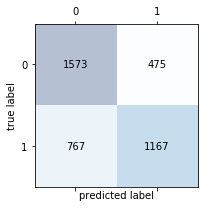

Precision: 0.711
Recall: 0.603
F1: 0.653
ROC AUC: 0.686
Accuracy: 0.688
-----------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.77      0.72      2048
          1       0.71      0.60      0.65      1934

avg / total       0.69      0.69      0.69      3982



In [98]:
evaluation(pipe_ada_2, X_test_undersample, y_test_undersample)

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

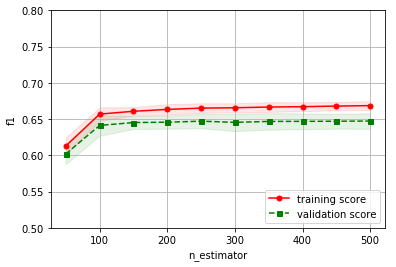

In [103]:
param_name = 'ada__n_estimators'
param_range = range(50,501,50)
plot_validation_curve(pipe_ada_2, X_train_undersample, y_train_undersample, param_name, param_range, 
                      "n_estimator", [0.5, 0.8], 5, scoring="f1")

In [76]:
pipe_ada_3 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=1), 
                    learning_rate=0.3, n_estimators=500,         
                    random_state=2))])

In [77]:
pipe_ada_3

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(cla...andom_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=500, random_state=2))])

In [78]:
pipe_ada_3.fit(X_train_undersample, y_train_undersample)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(cla...andom_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=500, random_state=2))])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

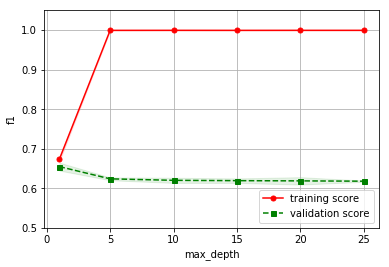

In [106]:
param_name = 'ada__base_estimator__max_depth'
param_range = [1, 5, 10, 15, 20, 25]
plot_validation_curve(pipe_ada_3, X_train_undersample, y_train_undersample, param_name, param_range, 
                      "max_depth", [0.5, 1.05], 3, scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

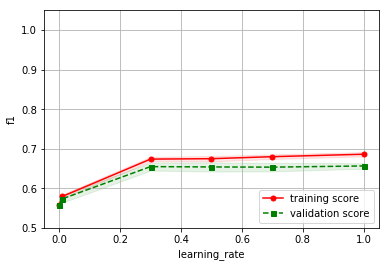

In [112]:
param_name = 'ada__learning_rate'
param_range = [0.001, 0.01, 0.3, 0.5, 0.7, 1.0]
plot_validation_curve(pipe_ada_3, X_train_undersample, y_train_undersample, param_name, param_range, 
                      "learning_rate", [0.50, 1.05], 3, scoring="f1")

[ 0.74580401  0.67714573  0.66893495  0.66939705  0.65867158  0.65568556
  0.65965421  0.65620462  0.65995747  0.66547438]


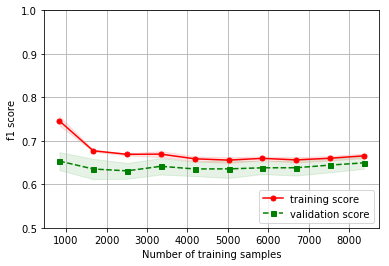

In [79]:
plot_learning_curve(pipe_ada_3, X_train_undersample, y_train_undersample, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.5, 1.0])

In [81]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.neighbors import KNeighborsClassifier
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a KNeighborsClassifier using default parameter
pipe_knn_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('knn', KNeighborsClassifier())])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_knn_1, X=X_train_undersample, y=y_train_undersample, cv=10, n_jobs=1, scoring="f1")
print('pipe_knn_1 Cross_validation f1 scores: %s' % (scores))
print('pipe_knn_1 Cross_validation f1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_knn_1 Cross_validation f1 scores: [ 0.65542677  0.66244726  0.67153285  0.63351351  0.6434024   0.67785939
  0.63225806  0.62168142  0.64142539  0.64270153]
pipe_knn_1 Cross_validation f1: 0.648 +/- 0.017


In [82]:
# Tuning parameters: 
# (1) n_neighbors : int, optional (default = 5), Number of neighbors to use by default for kneighbors queries
# (2) weights : str or callable, optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
# ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
# [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
# (3) metric : string or callable, default ‘minkowski’, 'knn__metric': ["euclidean", "manhattan", "minkowski"]
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.
param_grid_knn = {"knn__n_neighbors": np.arange(1, 31, 2), "knn__weights": ['uniform', 'distance'], 
              "knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
pipe_knn_2 = find_best_model(pipe_knn_1, X_train_undersample, y_train_undersample, param_grid=param_grid_knn, 
                             scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 245.29 seconds for 120 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.669 (std: 0.014)
Parameters: {'knn__n_neighbors': 27, 'knn__weights': 'uniform', 'knn__algorithm': 'auto'}

Model with rank: 1
Mean validation score: 0.669 (std: 0.014)
Parameters: {'knn__n_neighbors': 27, 'knn__weights': 'uniform', 'knn__algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.669 (std: 0.014)
Parameters: {'knn__n_neighbors': 27, 'knn__weights': 'uniform', 'knn__algorithm': 'kd_tree'}

Model with rank: 1
Mean validation score: 0.669 (std: 0.014)
Parameters: {'knn__n_neighbors': 27, 'knn__weights': 'uniform', 'knn__algorithm': 'brute'}

Model with rank: 5
Mean validation score: 0.668 (std: 0.016)
Parameters: {'knn__n_neighbors': 25, 'knn__weights': 'uniform', 'knn__algorithm': 'auto'}

Model with rank: 5
Mean validation score: 0.668 (std: 0.016)
Parameters: {'knn__n_neighbors': 25, 'knn__weights': 'uniform', 'knn__algorithm': 'ball_tree'}

Mod

In [83]:
pipe_knn_2

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform'))])

In [84]:
# use the best parameter 
pipe_knn_3 = Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
           weights='uniform'))])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

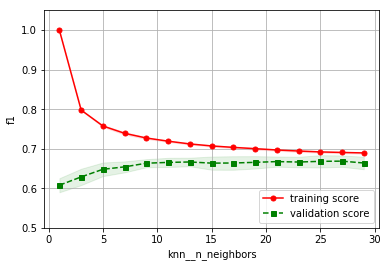

In [85]:
param_name_knn = 'knn__n_neighbors'
param_range = np.arange(1, 31, 2)
plot_validation_curve(pipe_knn_3, X_train_undersample, y_train_undersample, param_name_knn, param_range, 
                      "knn__n_neighbors", [0.5, 1.05], scoring="f1")

[ 0.68505511  0.66049311  0.6705735   0.66991816  0.67992164  0.68410715
  0.68559781  0.68759003  0.69037928  0.68963844]


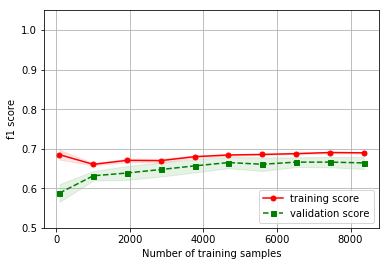

In [86]:
plot_learning_curve(pipe_knn_3, X=X_train_undersample, y=y_train_undersample, train_sizes=np.linspace(0.01, 1.0, 10), ylim=[0.5, 1.05])

In [87]:
pipe_knn_3.fit(X_train_undersample, y_train_undersample)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
           weights='uniform'))])

Querying with the best model took 0.139863 seconds.
3982
[[1497  551]
 [ 713 1221]]


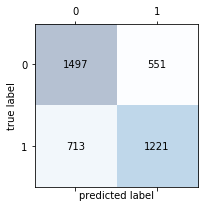

Precision: 0.689
Recall: 0.631
F1: 0.659
ROC AUC: 0.681
Accuracy: 0.683
-----------------------------------------
             precision    recall  f1-score   support

          0       0.68      0.73      0.70      2048
          1       0.69      0.63      0.66      1934

avg / total       0.68      0.68      0.68      3982



In [88]:
evaluation(pipe_knn_3, X_test_undersample, y_test_undersample)

In [106]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.svm import SVC
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a C-Support Vector Classification using default parameter
pipe_svc_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('svc', SVC(random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_svc_1, X=X_train_undersample, y=y_train_undersample, cv=5, n_jobs=1, scoring="f1")
print('pipe_svc_1 Cross_validation f1 scores: %s' % (scores))
print('pipe_svc_1 Cross_validation f1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_svc_1 Cross_validation f1 scores: [ 0.64647641  0.65602837  0.644589    0.59658011  0.64      ]
pipe_svc_1 Cross_validation f1: 0.637 +/- 0.021


In [ ]:
# Tuning parameters: 
# (1) svc__gamma : float, optional (default=’auto’)
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.
# (2) svc__C :  float, optional (default=1.0); Penalty parameter C of the error term.
# (3) svc__kernel : Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
# or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; 
# that matrix should be an array of shape (n_samples, n_samples).
# Reference: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

param_grid_svc = {'svc__C': np.logspace(-2, 10, 13), 'svc__gamma': np.logspace(-9, 3, 13), 
              'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
pipe_svc_2 = find_best_model(pipe_svc_1, X_train_undersample, y_train_undersample, param_grid=param_grid_svc, scoring='f1', cv=5, n_jobs=-1)

In [107]:
# Tuning parameters:
# Use randomsearchCV to do a Randomized Parameter Optimization to save computation time.
import scipy
param_grid_svc_random = {'svc__C': scipy.stats.expon(scale=100), 'svc__gamma': scipy.stats.expon(scale=.1),
  'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'svc__class_weight':['balanced', None]}

pipe_svc_3 = find_best_model_random_search(pipe_svc_1, X_train_undersample, y_train_undersample, 
                                           param_grid=param_grid_svc_random, n_iter=20, scoring='f1', cv=5, n_jobs=-1)

RandomizedSearchCV took 1073.54 seconds for 20 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.630 (std: 0.004)
Parameters: {'svc__C': 263.95675703465685, 'svc__class_weight': None, 'svc__kernel': 'linear', 'svc__gamma': 0.12329586206074102}

Model with rank: 2
Mean validation score: 0.629 (std: 0.005)
Parameters: {'svc__C': 171.03046654258947, 'svc__class_weight': None, 'svc__kernel': 'linear', 'svc__gamma': 0.11650788902694298}

Model with rank: 3
Mean validation score: 0.627 (std: 0.006)
Parameters: {'svc__C': 230.64069040718297, 'svc__class_weight': 'balanced', 'svc__kernel': 'linear', 'svc__gamma': 0.023846536274412439}

Model with rank: 4
Mean validation score: 0.627 (std: 0.006)
Parameters: {'svc__C': 16.529322510240309, 'svc__class_weight': 'balanced', 'svc__kernel': 'linear', 'svc__gamma': 0.038045036144873798}

Model with rank: 5
Mean validation score: 0.626 (std: 0.012)
Parameters: {'svc__C': 103.16971874149291, 'svc__gamma': 0.10038694058262865, 's

In [109]:
pipe_svc_3.get_params()

{'pca': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'scl': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('pca',
   PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)),
  ('svc',
   SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape=None, degree=3, gamma=0.12329586206074102,
     kernel='linear', max_iter=-1, probability=False, random_state=2,
     shrinking=True, tol=0.001, verbose=False))],
 'svc': SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0

In [110]:
# set best parameter for SVM.

pipe_svc_4 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('svc', SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape=None, degree=3, gamma=0.12329586206074102,
     kernel='linear', max_iter=-1, probability=False, random_state=2,
     shrinking=True, tol=0.001, verbose=False))])

In [111]:
pipe_svc_4

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.12329586206074102,
  kernel='linear', max_iter=-1, probability=False, random_state=2,
  shrinking=True, tol=0.001, verbose=False))])

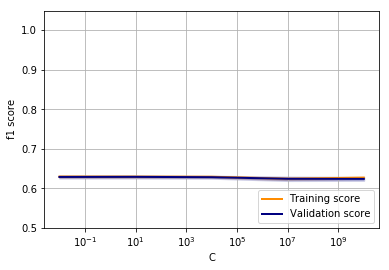

In [112]:
# Validation curve of C for pipe_svc_1
param_name = 'svc__C'
param_range = np.logspace(-2, 10, 5)
train_scores, test_scores = validation_curve(
    pipe_svc_4, X=X_train_undersample, y=y_train_undersample, param_name=param_name, param_range=param_range,
    cv=3, scoring="f1", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("f1 score")
plt.ylim(0.5, 1.05)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

[[ 0.63034224  0.63173906  0.62760506]
 [ 0.63023493  0.63230821  0.62743756]
 [ 0.63021632  0.63141892  0.62649777]
 [ 0.63044959  0.63209459  0.62758503]
 [ 0.63070116  0.63173906  0.62720274]]
[[ 0.62898253  0.62683578  0.63287671]
 [ 0.62898253  0.62750334  0.63331049]
 [ 0.62851268  0.62616822  0.63305898]
 [ 0.62851268  0.62666667  0.63356164]
 [ 0.62898253  0.6263773   0.63237311]]


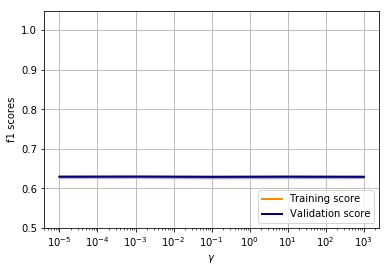

In [113]:
param_name = 'svc__gamma'
param_range = np.logspace(-5, 3, 5)
train_scores, test_scores = validation_curve(
    pipe_svc_4, X=X_train_undersample, y=y_train_undersample, param_name=param_name, param_range=param_range,
    cv=3, scoring="f1", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
print(train_scores)
print(test_scores)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("f1 scores")
plt.ylim(0.5, 1.05)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [114]:
pipe_svc_4

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.12329586206074102,
  kernel='linear', max_iter=-1, probability=False, random_state=2,
  shrinking=True, tol=0.001, verbose=False))])

[ 0.59506173  0.62448428  0.62236437  0.62958992  0.63021624  0.62844335
  0.62522161  0.62913325  0.62919366  0.62980638]


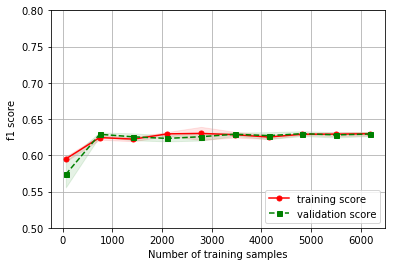

In [115]:
plot_learning_curve(pipe_svc_4, X=X_train_undersample, y=y_train_undersample, train_sizes=np.linspace(0.01, 1.0, 10), 
                    cv=3, scoring='f1', ylim=[0.5, 0.8])


In [117]:
pipe_svc_4.fit(X_train_undersample, y_train_undersample)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=263.95675703465685, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.12329586206074102,
  kernel='linear', max_iter=-1, probability=False, random_state=2,
  shrinking=True, tol=0.001, verbose=False))])

Querying with the best model took 0.755978 seconds.
3982
[[1451  597]
 [ 781 1153]]


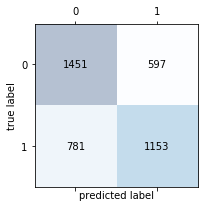

Precision: 0.659
Recall: 0.596
F1: 0.626
ROC AUC: 0.652
Accuracy: 0.654
-----------------------------------------
             precision    recall  f1-score   support

          0       0.65      0.71      0.68      2048
          1       0.66      0.60      0.63      1934

avg / total       0.65      0.65      0.65      3982



In [118]:
evaluation(pipe_svc_4, X_test_undersample, y_test_undersample)

In [89]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a Multi-layer Perceptron classifier using default parameter
pipe_nn_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('nn', MLPClassifier(random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_nn_1, X=X_train_undersample, y=y_train_undersample, cv=10, n_jobs=1, scoring="f1")
print('pipe_nn_1 Cross_validation f1 scores: %s' % (scores))
print('pipe_nn_1 Cross_validation f1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_nn_1 Cross_validation f1 scores: [ 0.63915094  0.67252747  0.66967306  0.64788732  0.66514286  0.65232975
  0.62287105  0.62211422  0.65066026  0.65529842]
pipe_nn_1 Cross_validation f1: 0.650 +/- 0.017


In [90]:
pipe_nn_1.get_params().keys()

dict_keys(['scl', 'steps', 'nn__warm_start', 'nn__momentum', 'nn__beta_1', 'scl__copy', 'nn__nesterovs_momentum', 'nn__validation_fraction', 'pca__iterated_power', 'nn', 'nn__activation', 'pca__random_state', 'nn__tol', 'nn__learning_rate_init', 'nn__beta_2', 'nn__max_iter', 'scl__with_std', 'nn__hidden_layer_sizes', 'pca__whiten', 'pca__n_components', 'nn__alpha', 'nn__verbose', 'nn__learning_rate', 'nn__solver', 'pca__copy', 'nn__shuffle', 'scl__with_mean', 'nn__epsilon', 'nn__batch_size', 'pca', 'nn__power_t', 'pca__tol', 'nn__early_stopping', 'pca__svd_solver', 'nn__random_state'])

In [91]:
pipe_nn_1.get_params()


{'nn': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
        solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
        warm_start=False),
 'nn__activation': 'relu',
 'nn__alpha': 0.0001,
 'nn__batch_size': 'auto',
 'nn__beta_1': 0.9,
 'nn__beta_2': 0.999,
 'nn__early_stopping': False,
 'nn__epsilon': 1e-08,
 'nn__hidden_layer_sizes': (100,),
 'nn__learning_rate': 'constant',
 'nn__learning_rate_init': 0.001,
 'nn__max_iter': 200,
 'nn__momentum': 0.9,
 'nn__nesterovs_momentum': True,
 'nn__power_t': 0.5,
 'nn__random_state': 2,
 'nn__shuffle': True,
 'nn__solver': 'adam',
 'nn__tol': 0.0001,
 'nn__validation_fraction': 0.1,
 'nn__verbose': False,
 'nn__warm_start': False,
 'pca': PCA(

In [92]:
# Tuning parameters: 
# (1) first tune which solver is best suited for this data set. 

param_grid_nn1 = {'nn__solver': ['lbfgs', 'sgd', 'adam']}
pipe_nn_2 = find_best_model(pipe_nn_1, X_train_undersample, y_train_undersample, 
                            param_grid=param_grid_nn1, scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 64.84 seconds for 3 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.660 (std: 0.016)
Parameters: {'nn__solver': 'lbfgs'}

Model with rank: 2
Mean validation score: 0.650 (std: 0.017)
Parameters: {'nn__solver': 'adam'}

Model with rank: 3
Mean validation score: 0.629 (std: 0.017)
Parameters: {'nn__solver': 'sgd'}

Training with the best model took 4.012669 seconds.


In [93]:
# Tuning parameters: 
# (2) tune which solver is best suited for this data set.

param_grid_nn2 = {'nn__activation': ['identity', 'logistic', 'tanh', 'relu']}
pipe_nn_3 = find_best_model(pipe_nn_2, X_train_undersample, y_train_undersample, param_grid=param_grid_nn2, scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 117.27 seconds for 4 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.661 (std: 0.016)
Parameters: {'nn__activation': 'relu'}

Model with rank: 2
Mean validation score: 0.658 (std: 0.018)
Parameters: {'nn__activation': 'tanh'}

Model with rank: 3
Mean validation score: 0.655 (std: 0.016)
Parameters: {'nn__activation': 'logistic'}

Model with rank: 4
Mean validation score: 0.634 (std: 0.010)
Parameters: {'nn__activation': 'identity'}

Training with the best model took 5.582032 seconds.


In [94]:
pipe_nn_3.get_params()

{'nn': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
        solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
        warm_start=False),
 'nn__activation': 'relu',
 'nn__alpha': 0.0001,
 'nn__batch_size': 'auto',
 'nn__beta_1': 0.9,
 'nn__beta_2': 0.999,
 'nn__early_stopping': False,
 'nn__epsilon': 1e-08,
 'nn__hidden_layer_sizes': (100,),
 'nn__learning_rate': 'constant',
 'nn__learning_rate_init': 0.001,
 'nn__max_iter': 200,
 'nn__momentum': 0.9,
 'nn__nesterovs_momentum': True,
 'nn__power_t': 0.5,
 'nn__random_state': 2,
 'nn__shuffle': True,
 'nn__solver': 'lbfgs',
 'nn__tol': 0.0001,
 'nn__validation_fraction': 0.1,
 'nn__verbose': False,
 'nn__warm_start': False,
 'pca': PC

In [95]:
# Tuning parameters: 
# (3) Tune Batch Size and Number of Epochs.

param_grid_nn3 = {'nn__batch_size': [10, 20, 40, 60, 100, 200], 'nn__max_iter': [10, 100, 200, 400, 600, 1000]}
pipe_nn_4 = find_best_model(pipe_nn_3, X_train_undersample, y_train_undersample, param_grid=param_grid_nn3, scoring='f1', cv=10, n_jobs=-1)

GridSearchCV took 1276.56 seconds for 36 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.665 (std: 0.014)
Parameters: {'nn__max_iter': 1000, 'nn__batch_size': 100}

Model with rank: 2
Mean validation score: 0.665 (std: 0.012)
Parameters: {'nn__max_iter': 1000, 'nn__batch_size': 200}

Model with rank: 3
Mean validation score: 0.665 (std: 0.013)
Parameters: {'nn__max_iter': 600, 'nn__batch_size': 10}

Model with rank: 4
Mean validation score: 0.664 (std: 0.015)
Parameters: {'nn__max_iter': 1000, 'nn__batch_size': 20}

Model with rank: 5
Mean validation score: 0.664 (std: 0.014)
Parameters: {'nn__max_iter': 1000, 'nn__batch_size': 60}

Training with the best model took 59.602018 seconds.


In [96]:
# Tuning parameters: 
# (4) Tune the Number of Neurons in the Hidden Layer.

param_grid_nn4 = {'nn__hidden_layer_sizes': [1, 5, 20, 60, 100, 150, 200]}
pipe_nn_5 = find_best_model(pipe_nn_4, X_train_undersample, y_train_undersample, param_grid=param_grid_nn4, scoring='f1', cv=5, n_jobs=-1)

GridSearchCV took 355.83 seconds for 7 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.665 (std: 0.009)
Parameters: {'nn__hidden_layer_sizes': 150}

Model with rank: 2
Mean validation score: 0.662 (std: 0.013)
Parameters: {'nn__hidden_layer_sizes': 100}

Model with rank: 3
Mean validation score: 0.661 (std: 0.006)
Parameters: {'nn__hidden_layer_sizes': 20}

Model with rank: 4
Mean validation score: 0.658 (std: 0.014)
Parameters: {'nn__hidden_layer_sizes': 200}

Model with rank: 5
Mean validation score: 0.657 (std: 0.009)
Parameters: {'nn__hidden_layer_sizes': 60}

Training with the best model took 87.285974 seconds.


In [97]:
# Tuning parameters: 
# (5) Tune alpha : float, optional, default 0.0001, L2 penalty (regularization term) parameter.

param_grid_nn5 = {'nn__alpha': 10.0 ** -np.arange(1, 7)}
pipe_nn_6 = find_best_model(pipe_nn_5, X_train_undersample, y_train_undersample, param_grid=param_grid_nn5, scoring='f1', cv=5, n_jobs=-1)

GridSearchCV took 380.39 seconds for 6 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.666 (std: 0.011)
Parameters: {'nn__alpha': 0.10000000000000001}

Model with rank: 2
Mean validation score: 0.665 (std: 0.011)
Parameters: {'nn__alpha': 0.0001}

Model with rank: 3
Mean validation score: 0.664 (std: 0.007)
Parameters: {'nn__alpha': 0.01}

Model with rank: 4
Mean validation score: 0.663 (std: 0.003)
Parameters: {'nn__alpha': 9.9999999999999995e-07}

Model with rank: 5
Mean validation score: 0.663 (std: 0.008)
Parameters: {'nn__alpha': 0.001}

Training with the best model took 29.647843 seconds.


In [98]:
pipe_nn_6.get_params()

{'nn': MLPClassifier(activation='relu', alpha=0.10000000000000001, batch_size=100,
        beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=150, learning_rate='constant',
        learning_rate_init=0.001, max_iter=1000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
        solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
        warm_start=False),
 'nn__activation': 'relu',
 'nn__alpha': 0.10000000000000001,
 'nn__batch_size': 100,
 'nn__beta_1': 0.9,
 'nn__beta_2': 0.999,
 'nn__early_stopping': False,
 'nn__epsilon': 1e-08,
 'nn__hidden_layer_sizes': 150,
 'nn__learning_rate': 'constant',
 'nn__learning_rate_init': 0.001,
 'nn__max_iter': 1000,
 'nn__momentum': 0.9,
 'nn__nesterovs_momentum': True,
 'nn__power_t': 0.5,
 'nn__random_state': 2,
 'nn__shuffle': True,
 'nn__solver': 'lbfgs',
 'nn__tol': 0.0001,
 'nn__validation_fraction': 0.1,
 'nn__verbose': False,
 'nn__warm_start': F

In [99]:
# Choose best parameter for the NN model
pipe_nn_7 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('nn', MLPClassifier(activation='relu', alpha=0.10000000000000001, batch_size=100,
          beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
          hidden_layer_sizes=150, learning_rate='constant',
          learning_rate_init=0.001, max_iter=1000, momentum=0.9,
          nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
          solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
          warm_start=False))])

[ 0.72466921  0.71131967  0.68235969  0.67458274  0.6756165   0.66359083
  0.66645487  0.6762087   0.67047553  0.6761711 ]


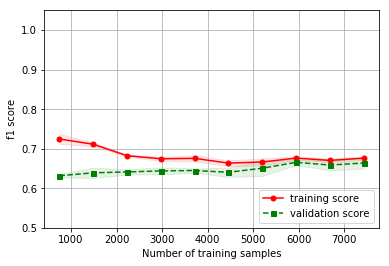

In [100]:

plot_learning_curve(pipe_nn_7, X=X_train_undersample, y=y_train_undersample, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
                    ylim=[0.5, 1.05])

In [101]:
pipe_nn_7

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nn', MLPClassifier(activation='relu', alpha=0.1, batch_size=100, beta_1=0.9,
       beta_2=0.999,...      solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

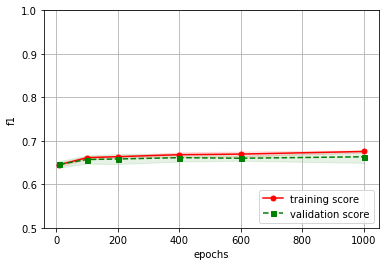

In [104]:
param_name_nn1 = 'nn__max_iter' 
param_range_nn1 = [10, 100, 200, 400, 600, 1000]
plot_validation_curve(pipe_nn_7, X_train_undersample, y_train_undersample, param_name_nn1, 
                      param_range_nn1, "epochs", [0.5, 1.00], 5, scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

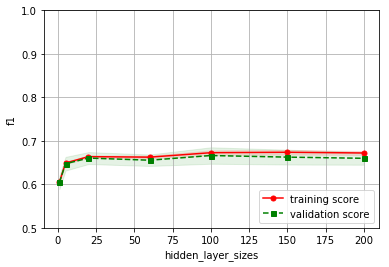

In [102]:
param_name_nn2 = 'nn__hidden_layer_sizes' 
param_range_nn2 = [1, 5, 20, 60, 100, 150, 200]
plot_validation_curve(pipe_nn_7, X_train_undersample, y_train_undersample, param_name_nn2, 
                      param_range_nn2, "hidden_layer_sizes", [0.5, 1.00], scoring="f1")

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

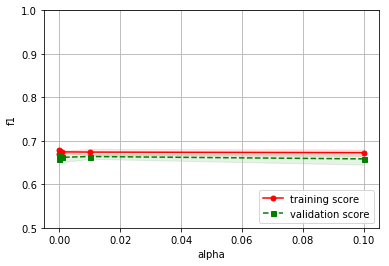

In [103]:
param_name_nn3 = 'nn__alpha' 
param_range_nn3 = 10.0 ** -np.arange(1, 7)
plot_validation_curve(pipe_nn_7, X_train_undersample, y_train_undersample, param_name_nn3, 
                      param_range_nn3, "alpha", [0.5, 1.00], 5, scoring="f1")

Querying with the best model took 0.008019 seconds.
3982
[[1526  522]
 [ 755 1179]]


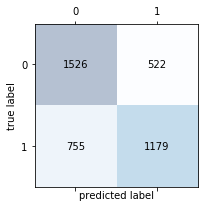

Precision: 0.693
Recall: 0.610
F1: 0.649
ROC AUC: 0.677
Accuracy: 0.679
-----------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.75      0.71      2048
          1       0.69      0.61      0.65      1934

avg / total       0.68      0.68      0.68      3982



In [105]:
pipe_nn_7.fit(X_train_undersample, y_train_undersample)
evaluation(pipe_nn_7, X_test_undersample, y_test_undersample)

In [108]:
pipe_nn_7

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nn', MLPClassifier(activation='relu', alpha=9.9999999999999995e-07, batch_size=100,
       beta_1...      solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])